In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
whole_data = np.load('../Data_Preprocessing/output/28630_Dataset/training_data.npy')
whole_labels_flatten = np.load('../Data_Preprocessing/output/28630_Dataset/training_dists_flatten.npy')

In [3]:
print(whole_data.shape)
print(whole_labels_flatten.shape)

(28630, 100, 1000, 1)
(28630, 4950)


In [4]:
samples_count = whole_data.shape[0]

random.seed(100)

shuffle_indices = random.sample(range(0, samples_count), 1000)

In [5]:
whole_data_select = whole_data[shuffle_indices]
whole_labels_flatten_select = whole_labels_flatten[shuffle_indices]

In [6]:
print(whole_data_select.shape)
print(whole_labels_flatten_select.shape)

(1000, 100, 1000, 1)
(1000, 4950)


## Plot before shuffling (1000*100, 1000)

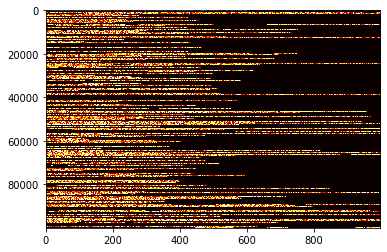

In [7]:
whole_data_before_shuffle = whole_data_select.reshape((whole_data_select.shape[0]*100, 1000))
plt.imshow(whole_data_before_shuffle, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

## Shuffle each input sample (1000*100, 1000)

Shuffle the **rows and the columns (100, 1000)** for each sample

In [8]:
for i in range(whole_data_select.shape[0]):
    shuffle_indices_100 = random.sample(range(0, 100), 100)
    shuffle_indices_1000 = random.sample(range(0, 1000), 1000)
    tmp = whole_data_select[i][shuffle_indices_100]
    tmp = tmp[:, shuffle_indices_1000]
    whole_data_select[i] = tmp

## Plot after shuffling (1000*100, 1000)

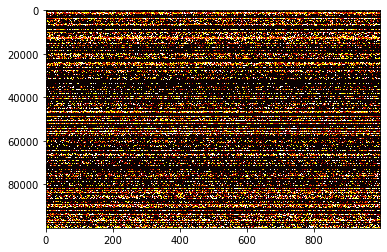

In [9]:
whole_data_after_shuffle = whole_data_select.reshape((whole_data_select.shape[0]*100, 1000))
plt.imshow(whole_data_after_shuffle, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

In [10]:
print('whole_data_select: ', whole_data_select.shape)
print('whole_labels_flatten_select: ', whole_labels_flatten_select.shape)

whole_data_select:  (1000, 100, 1000, 1)
whole_labels_flatten_select:  (1000, 4950)


In [11]:
np.save('./output/universal_test_data_seed_100.npy', whole_data_select)
np.save('./output/universal_test_label_seed_100.npy', whole_labels_flatten_select)